### parallel plate waveguide

Populating the interactive namespace from numpy and matplotlib


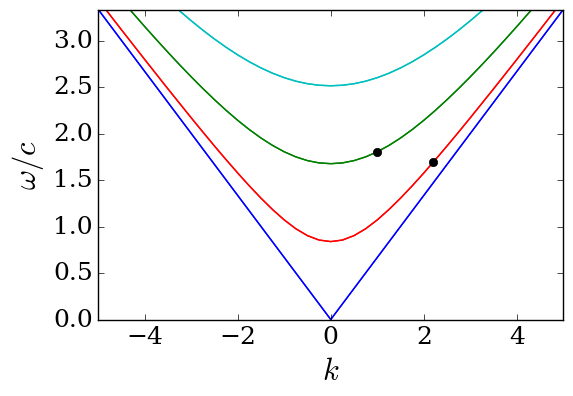

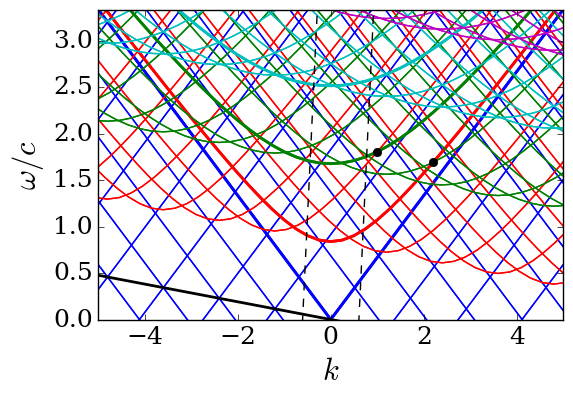

In [1]:
%pylab inline

import numpy as np
from scipy import constants
import matplotlib

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)


n = 1.5
c = constants.c
d = 2.5

N = 201
k_max = 5.0
w_max = k_max/n*c
k = np.linspace(-5.0*k_max, 5.0*k_max, N)

def ppwg_w(w, m): 
    kc = m*np.pi/d
    k0 = w/c*n
    k = np.sqrt(k0**2 - kc**2) 
    k = np.ma.masked_where(np.abs(np.imag(k))!=0.0, k)
    return k

def ppwg_k(k, m): 
    kc = m*np.pi/d
    w = np.sqrt(k**2 + kc**2)*c/n 
    return w


d_kw = 1.2
phi = 10.0/180.0*np.pi
d_k = d_kw*np.cos(phi)
d_w = d_kw/n*c*np.sin(phi)
n_mode = 20

mode_1, k_1 = 1, 2.2
mode_2, k_2 = 2, 1.0
w_1, w_2 = ppwg_k(k_1, mode_1), ppwg_k(k_2, mode_2)
d_k = k_2 - k_1
d_w = w_2 - w_1


n_ppwg = 6
mode_color = None
if n_ppwg<=6:
    mode_color = ['b', 'r', 'g', 'c', 'm', 'y']
else:
    mode_color = [tuple(np.random.rand(3)) for i in range(n_ppwg)]
    
for m in range(n_ppwg):
    w = ppwg_k(k, m)
    color = mode_color[m]
    plot(k, w/c, color=color)
    plot(-k, w/c, color=color)
plot([k_1, k_2], [w_1/c, w_2/c], 'ko')
xlim(-k_max, k_max)
ylim(0, w_max/c)
ylabel(r'$\omega/c$', fontsize=22)
xlabel(r'$k$', fontsize=22)

savefig(os.path.join(dir_name, 'ppwg-disp' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


for m in range(n_ppwg):
    w = ppwg_k(k, m)
    color = mode_color[m]
    for i in range(-n_mode, n_mode+1):
        lw=1
        if i==0:
            lw=2
        plot(np.real(k+i*d_k), (w+i*d_w)/c, color=color, lw=lw)
        plot(np.real(k+i*d_k), (-w+i*d_w)/c, color=color, lw=lw)
        plot(np.real(-k+i*d_k), (w+i*d_w)/c, color=color, lw=lw)
        plot(np.real(-k+i*d_k), (-w+i*d_w)/c, color=color, lw=lw)

plot(10*np.array([-d_k, d_k]), 10*np.array([-d_w, d_w])/c, color='k', linestyle='-', linewidth=2)

bz = np.array([0.5*d_k, 0.5*d_w/c])
bz_n = 20.0*np.array([-bz[1], bz[0]])  ##normal
plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')

plot([k_1, k_2], [w_1/c, w_2/c], 'ko')

xlim(-k_max, k_max)
ylim(0, w_max/c)
ylabel(r'$\omega/c$', fontsize=22)
xlabel(r'$k$', fontsize=22)

savefig(os.path.join(dir_name, 'ppwg-disp-Brillouin' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()



